## EN3160 - Assignment 1 on Intensity Transformations and Neighborhood Filtering

### Kodikara U. S. S. 210293K

256


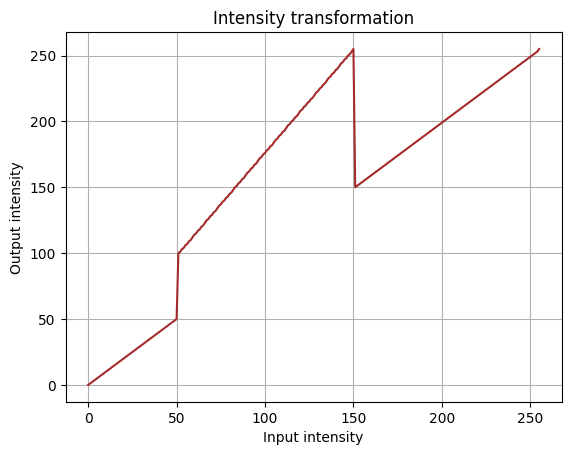

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define each segment
t1 = np.linspace(0, 50, 51).astype('uint8')     # 50 samples from 0 to 50
t2 = np.linspace(50, 100, 0).astype('uint8')    # 50 samples at a constant value 50
t3 = np.linspace(100, 255, 100).astype('uint8')  # 100 samples from 50 to 255
t4 = np.linspace(255, 150, 0).astype('uint8') # 105 samples from 255 to 150 (decreasing)
t5 = np.linspace(150, 255, 105).astype('uint8') # 105 samples from 150 to 255

# Concatenate all segments to form the complete transformation
transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')

# Check the length of the final transformation
print(len(transform))  

# Plot the transformation
plt.plot(transform, color='brown')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.title('Intensity transformation')
plt.grid(True)

# Show the plot
plt.show()


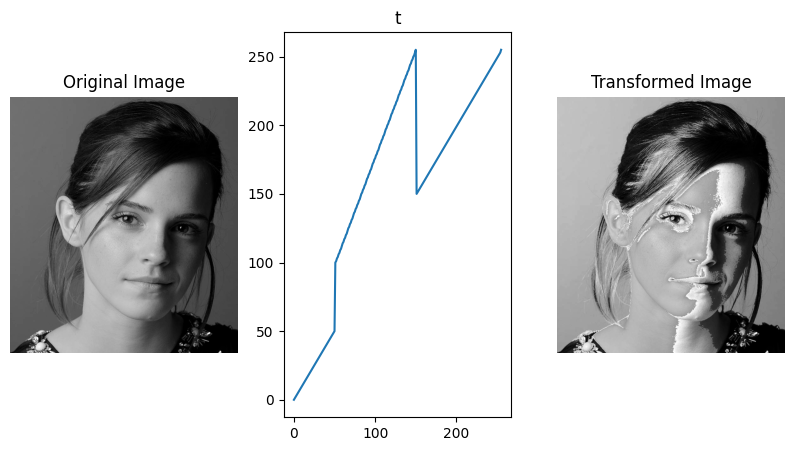

In [26]:
f= cv.imread('a1images\emma.jpg', cv.IMREAD_GRAYSCALE) # Read the image

assert f is not None, "Image not found"  # Check if the image is loaded
g = cv.LUT(f, transform) # Apply the transformation to the image

fig, ax = plt.subplots(1, 3, figsize=(10, 5)) # Create a figure with 3 subplots
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(transform)
ax[1].set_title('t')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed Image')   
ax[2].axis('off')
plt.show()